__Phone data and Meta data merged file imported from part-1__

In [1]:
# Importing the drive to upload the dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# For Dataset Operation
import pandas as pd
import numpy as np
pd.set_option('max_colwidth',100)

# For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# For Text Analytics
import nltk
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

# For Matrix and Model evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve

In [3]:
# Creating merged csv file
df_merged1 = pd.read_csv('/content/drive/MyDrive/capstone/merged.csv')

In [4]:
df_merged1["verified"].value_counts()

verified
True     529811
False     74068
Name: count, dtype: int64

In [4]:
# after merging dataframes lets change datatypes of boolean columns to integer (true =1, false=0)
df_merged1["verified"].replace({False: 0, True: 1}, inplace=True)

In [5]:
df_merged1["verified"].value_counts()

verified
1    529811
0     74068
Name: count, dtype: int64

In [6]:
df_merged= df_merged1.copy()

In [7]:
#pip install xlsxwriter

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 159.9/159.9 kB 1.5 MB/s eta 0:00:00


In [8]:
# Converting to xlsx format and saving
#df_merged1.to_excel(r"/content/drive/My Drive/capstone/merged_excelfile.xlsx", index=False, header=True, engine= 'xlsxwriter')


/usr/local/lib/python3.10/dist-packages/xlsxwriter/worksheet.py:1251: UserWarning: Ignoring URL 'https://www.youtube.com/watch?v=pcF7UUxIyXk&feature=youtu.be

I%20recently%20upgraded%20from%20my%20Sprint%20Samsung%20Galaxy%20S4%20with%20the%20official%20Samsung%20S-Charger%20Qi%20Wireless%20Charging%20back%20cover%20and%20the
Spigen%20Neo%20Hybrid%20(polycarbonate)%20case%20to%20the%20Sprint%20Samsung%20Galaxy%20Note%204.%20%20I%20wanted%20a%20similar%20case%20and%20to%20continue%20to%20have%20Qi
Wireless%20Charging%20capabilities.%20%20Unfortunately%20the%20official%20Samsung%20S-Charger%20Qi%20Wireless%20Charging%20back%20cover%20for%20the%20Note%204%20is%20too
thick%20to%20fit%20almost%20any%20of%20the%20available%20cases.%20%20The%20only%20case%20that%20I've%20found%20that%20sort%20of%20fits%20is%20the%20Verus%20IronShield%20but%20even
that%20is%20a%20stretch.%20%20If%20you%20really%20want%20to%20do%20it,%20it'll%20work,%20but%20it%20also%20adds%20significantly%20to%20the%20weight%

In [8]:
df_merged1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603879 entries, 0 to 603878
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0.1      603879 non-null  int64  
 1   overall           603879 non-null  float64
 2   verified          603879 non-null  int64  
 3   reviewerID        603879 non-null  object 
 4   asin              603879 non-null  object 
 5   style             603879 non-null  object 
 6   reviewerName      603771 non-null  object 
 7   reviewText        603879 non-null  object 
 8   summary           603879 non-null  object 
 9   review_sentiment  603879 non-null  object 
 10  Date&Time         603879 non-null  object 
 11  Unnamed: 0        603879 non-null  int64  
 12  category          603879 non-null  object 
 13  description       603879 non-null  object 
 14  title             603879 non-null  object 
 15  also_buy          603879 non-null  object 
 16  image             60

In [9]:
df_merged1['overall'].value_counts()

overall
5.0    384012
4.0     99445
3.0     51674
1.0     39454
2.0     29294
Name: count, dtype: int64

In [7]:
# counting positive and negative instances
pos_neg = df_merged1.review_sentiment.value_counts()
pos_neg

review_sentiment
POSITIVE    478497
NEGATIVE    125382
Name: count, dtype: int64

__Checking data imbalance between review_sentiment__

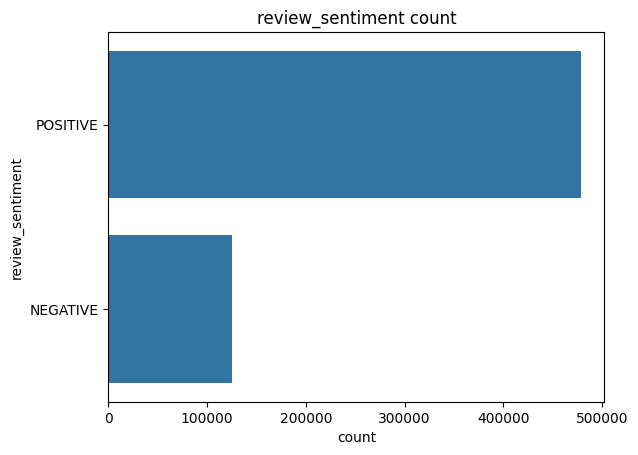

In [11]:
plt.title("review_sentiment count")
sns.countplot(df_merged1['review_sentiment'])
plt.show()

In [8]:
# mapping labels to 0 and 1
df_merged1['review_sentiment'] = df_merged1.review_sentiment.map({'POSITIVE':1, 'NEGATIVE':0})

In [13]:
df_merged1.tail(3)

,Unnamed: 0.1,overall,verified,reviewerID,asin,style,reviewerName,reviewText,summary,review_sentiment,...,title,also_buy,image,brand,feature,also_view,details,main_cat,price,new_rank
603876,603876,4.0,1,A2A0R02F3X1KIR,B01H8AH2YG,{'Color:': ' Flip Black'},Pen Name,Good!,Four Stars,1,...,"Moto G4 Plus Screen Protector, Nillkin [H+ Pro] Tempered Glass 0.2mm 2.5D Round Edges Anti-glare...",[],"['https://images-na.ssl-images-amazon.com/images/I/41H05A5yLkL._SX38_SY50_CR,0,0,38,50_.jpg', 'h...",Nillkin,"['Designed for Moto G4 Plus, premium Japan AGC glass with extreme 9H screen hardness, anti-scrat...",[],{},Cell Phones & Accessories,12.444746,1305919.0
603877,603877,1.0,0,A38VTUFSDSCJEO,B01H8AH2YG,{'Color:': ' Flip Black'},Jackknifer,This case DO NOT have sleep wake functionality. It is falsely advertise. It's just a plastic cas...,Sleep Wake Function is a lie,0,...,"Moto G4 Plus Screen Protector, Nillkin [H+ Pro] Tempered Glass 0.2mm 2.5D Round Edges Anti-glare...",[],"['https://images-na.ssl-images-amazon.com/images/I/41H05A5yLkL._SX38_SY50_CR,0,0,38,50_.jpg', 'h...",Nillkin,"['Designed for Moto G4 Plus, premium Japan AGC glass with extreme 9H screen hardness, anti-scrat...",[],{},Cell Phones & Accessories,12.444746,1305919.0
603878,603878,5.0,1,A1OYBK51GL241P,B01H8AH2YG,{'Color:': ' PC Black'},Rueben Ramirez,Great case at a great price,Great case at a great price,1,...,"Moto G4 Plus Screen Protector, Nillkin [H+ Pro] Tempered Glass 0.2mm 2.5D Round Edges Anti-glare...",[],"['https://images-na.ssl-images-amazon.com/images/I/41H05A5yLkL._SX38_SY50_CR,0,0,38,50_.jpg', 'h...",Nillkin,"['Designed for Moto G4 Plus, premium Japan AGC glass with extreme 9H screen hardness, anti-scrat...",[],{},Cell Phones & Accessories,12.444746,1305919.0


In [9]:
# Changes the overall category to categorical from numerical for easier visualizations
df_merged1["classes"] = df_merged1["overall"]
df_merged1["classes"].replace({5.0: "positive",4.0:"positive",3.0:"neutral",2.0:"negative",1.0:"negative"}, inplace=True)
df_merged1["classes"].unique()

array(['positive', 'neutral', 'negative'], dtype=object)

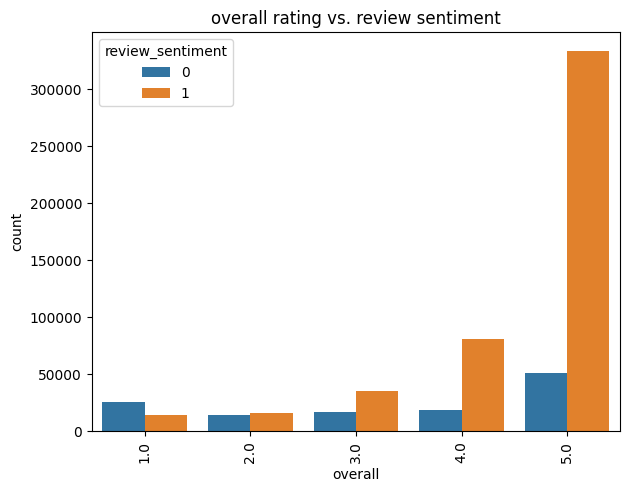

In [15]:
plt.figure()
sns.countplot(data=df_merged1,x=df_merged1["overall"],hue=df_merged1["review_sentiment"])
plt.xticks(rotation=90)
plt.tight_layout()
plt.title("overall rating vs. review sentiment")
plt.show()

# Step 2:Text Analytics

In [10]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [38]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [11]:
# Reading stop words from a text file in to a list
stop_words = [line.rstrip('\n') for line in open('/content/drive/MyDrive/capstone/stop_words_long.txt')]


First step is to remove stop words , here we will use above file to remove stop words because we dont want to remove required words which help us in text analytics. Also we will remove any puncuation marks and numbers etc.

__Functions removing stop words , positive and negative words and punctuation marks.__

In [12]:
# function for removing stop words

stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()
def preprocess(document):

    # change sentence to lower case
    document = document.lower()


    # tokenize into words
    words = word_tokenize(document)

    # remove stop words
    words = [word for word in words if word not in stop_words]


    # take only thos words whose length is greater than 2
    words=[w for w in words if len(w)>2]

    # join words to make sentence
    document = " ".join(words)

    return document

In [13]:
# function to remove positive / negative words from document

def remove_words(document):
   # tokenize into words
    words = word_tokenize(document)

    # remove positive/negative words
    words = [word for word in words if word not in positive_words]
    words = [word for word in words if word not in negative_words]

    document = " ".join(words)

    return document

In [14]:
# function to remove punctuations
import re
def remove_punctuations(text):
    text = re.sub('[^A-Za-z]+', ' ', text)

    return text

In [36]:
# lemmatization

stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()
def apply_lemmatization(document):
     # tokenize into words
         # change sentence to lower case
    document = document.lower()
    words = word_tokenize(document)

    # remove stop words
    words = [word for word in words if word not in stop_words]

    #apply lemmatization
    words = [wordnet_lemmatizer.lemmatize(word, pos='v') for word in words]

    words=[w for w in words if len(w)>2]

    # join words to make sentence
    document = " ".join(words)

    return document


In [16]:
def clean_dataframe(df):
  # creates new column with corresponding class labels, the output variable.
  df['y'] = df['overall'].apply(classify)

  # dropping uneccesary columns for the analysis
  df = df.drop(labels=['Unnamed: 0', 'verified','asin' ,'style','reviewerName',  'description','title', 'main_cat' ],axis=1)

  # dropping all NaN values from the column reviewText
  df = df.dropna(axis=0, subset=['reviewText'])
  return df

In [17]:
# splits review rating into different classes, say positive(2), neutral(1) and negative(0).
def classify(x):
    if x == 5.0 or x==4.0:
        return 2
    if x==3.0:
        return 1
    return 0

In [18]:
df_merged1=clean_dataframe(df_merged1)

In [19]:
# removes all the punctuations for the strings of reviewText, ie '!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'
import string
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct

In [20]:
def text_process(df):
  # Removing all the punctuations from the words, and changing the words to lower case to maintain uniformity
  df['reviewText']=df['reviewText'].apply(lambda x: remove_punctuation(x.lower()))
  # stemming
  stemmer = PorterStemmer()
  # stop words are the words like "the, I, our etc"
  words = stop_words
  df['cleaned_reviews'] = df['reviewText'].apply(lambda x: " ".join([stemmer.stem(i) for i in re.sub("[^a-zA-Z]", " ", x).split() if i not in words]).lower())
  return df

In [21]:
df_merged1['reviewText']=df_merged1['reviewText'].astype('str')

In [22]:
df_merged1=text_process(df_merged1)

In [23]:
# Dropping null values to have a cleaner dataset

df_merged1 = df_merged1.dropna(subset=['cleaned_reviews'])

__Words and word clouds__

In [24]:
from wordcloud import WordCloud, STOPWORDS

In [25]:
# Most repeated words in reviews
stopwords = stop_words
def word_cloud(data, title):
    wordcloud = WordCloud(
    background_color = "white",
    max_font_size = 40,
    max_words = 200,
    stopwords = stopwords,
    scale = 3).generate(str(data))
    fig = plt.figure(figsize = (8.5, 8.5))
    plt.axis("on")
    if title:
        fig.suptitle(title, fontsize=15)
        fig.subplots_adjust(top=2.35)
    plt.imshow(wordcloud)
    plt.show()

In [26]:
# seperating all records into a different variable to generate wordcloud based on category
neu=df_merged1[df_merged1["classes"] == "neutral"]["cleaned_reviews"]
neg=df_merged1[df_merged1["classes"] == "negative"]["cleaned_reviews"]
pos=df_merged1[df_merged1["classes"] == "positive"]["cleaned_reviews"]

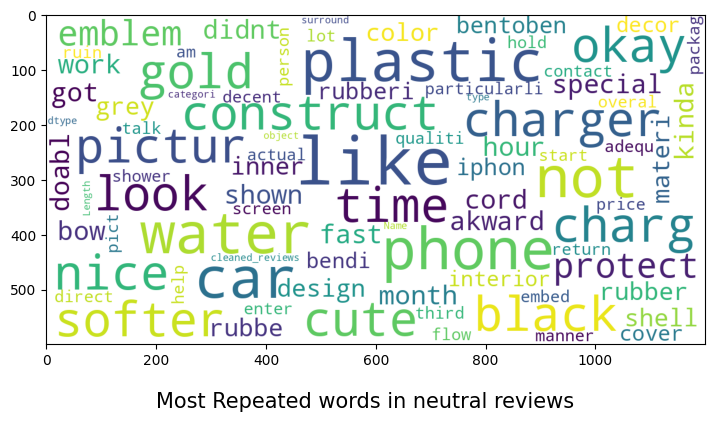

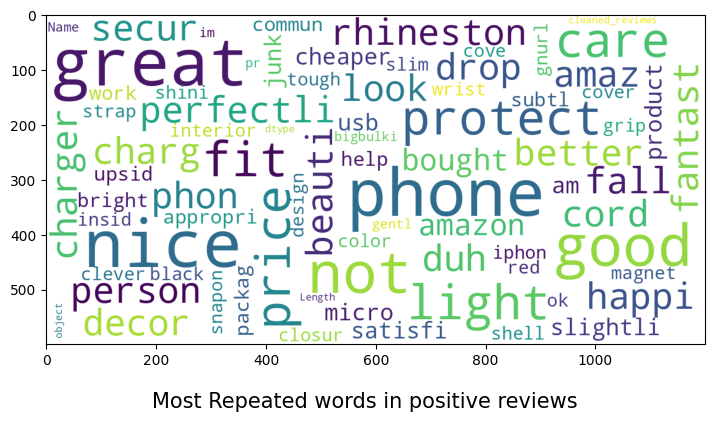

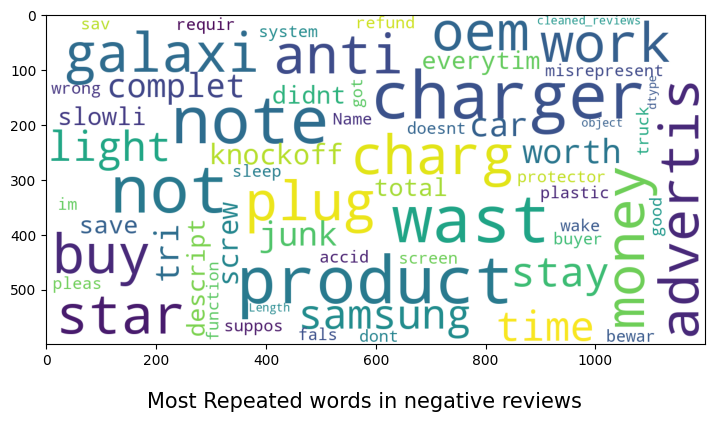

In [27]:
# Generating wordcloud based on category
word_cloud(neu, "Most Repeated words in neutral reviews")
word_cloud(pos, "Most Repeated words in positive reviews")
word_cloud(neg, "Most Repeated words in negative reviews")

**Preprocessing review text for tableau visualization**

In [28]:
# make new dataframe for only reviews and sentiment
df_review = df_merged1[["reviewText","review_sentiment"]]

In [29]:
df_review.head(3)

,reviewText,review_sentiment
0,looks even better in person be careful to not drop your phone so often because the rhinestones w...,1
1,happy it,1
2,it was a very cute phone case,1


In [30]:
df_review["review_text_nostop"]=[preprocess(x) for x in df_review["reviewText"]]

<ipython-input-30-c2d9bafe808d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review["review_text_nostop"]=[preprocess(x) for x in df_review["reviewText"]]


In [31]:
df_review["review_text_nostop"]

0         looks better person careful not drop phone rhinestones fall duh decorative protective fits perfe...
1                                                                                                       happy
2                                                                                                  cute phone
3                                               didnt thats shown picture got black gold bow cute not picture
4         charger amazing fantastic cord charges phone beautifully bought amazon slightly cheaper junk mic...
                                                         ...                                                 
603874                                                                                                       
603875    nice tough snapon slim clever design nicely gnurled grip not care bigbulky protective gentle pho...
603876                                                                                                   good
603877    

In [32]:
# Reading positive words from a text file in to a list
positive_words = [line.rstrip('\n') for line in open('/content/drive/MyDrive/capstone/pos_words.txt')]

In [33]:
# Reading negative words from a text file in to a list
negative_words = [line.rstrip('\n') for line in open('/content/drive/MyDrive/capstone/neg_words.txt')]


In [34]:
# Removing punctuation
df_review["review_text_nostop"] = df_review['review_text_nostop'].apply(remove_punctuations)

<ipython-input-34-1d93d66f16b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review["review_text_nostop"] = df_review['review_text_nostop'].apply(remove_punctuations)


In [39]:
# after removing punctuation marks still there are some stop words so running above function to remove remaining stopwords and do lemmatization.
df_review["review_text_nostop"]=[apply_lemmatization(x) for x in df_review["review_text_nostop"]]

<ipython-input-39-6eb2d6d6cfdd>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_review["review_text_nostop"]=[apply_lemmatization(x) for x in df_review["review_text_nostop"]]


In [40]:
df_review["review_text_nostop"]

0         look better person careful not drop phone rhinestones fall duh decorative protective fit perfect...
1                                                                                                       happy
2                                                                                                  cute phone
3                                                didnt thats show picture get black gold bow cute not picture
4         charger amaze fantastic cord charge phone beautifully buy amazon slightly cheaper junk micro usb...
                                                         ...                                                 
603874                                                                                                       
603875    nice tough snapon slim clever design nicely gnurled grip not care bigbulky protective gentle pho...
603876                                                                                                   good
603877    

In [41]:
# divided positive and negative review in different dataframe to create word cloud in tableau

df_positive = df_review[df_review["review_sentiment"]==1][["review_text_nostop","review_sentiment"]]
df_negative = df_review[df_review["review_sentiment"]==0][["review_text_nostop","review_sentiment"]]


In [42]:
# prepare file for wordcloud negative and positive and export those file
neg_sentiment_features= df_negative[["review_text_nostop"]]
pos_sentiment_features= df_positive[["review_text_nostop"]]

In [43]:
pos_sentiment_features.head()

,review_text_nostop
0,look better person careful not drop phone rhinestones fall duh decorative protective fit perfect...
1,happy
2,cute phone
3,didnt thats show picture get black gold bow cute not picture
4,charger amaze fantastic cord charge phone beautifully buy amazon slightly cheaper junk micro usb...


In [44]:
neg_sentiment_features.head()

,review_text_nostop
8,cord black car kinda look akward
11,advertise galaxy note charger not charger plug note charge slowly
21,last
22,beyond expectations
24,product perform advertise


In [45]:
list_pos= [str(w).split(" ") for w in neg_sentiment_features["review_text_nostop"]]
list_neg= [str(w).split(" ") for w in neg_sentiment_features["review_text_nostop"]]

In [46]:
#flatten the list
import itertools
merged_pos = list(itertools.chain(*list_pos))
merged_neg = list(itertools.chain(*list_neg))

In [47]:
print(len(merged_neg))
print(len(merged_pos))

1688057
1688057


In [48]:
#creating dataframe out of it
df_pos = pd.DataFrame({'col':merged_pos})
df_neg = pd.DataFrame({'col':merged_neg})

In [49]:
#df_pos.to_csv("/content/drive/My Drive/capstone/pos_sentiment_word.csv")
#df_neg.to_csv("/content/drive/My Drive/capstone/neg_sentiment_word.csv")


__Files already used for tableau visualisation__

__Bag of Words__

In [50]:
# Bag of words for Positive Sentiment
positive_reviews= [message for message in pos_sentiment_features['review_text_nostop']]

In [51]:
# bag of words model
vectorizer = CountVectorizer(max_features= 1000, stop_words= stop_words,ngram_range=(1, 2))
positive_bow_model = vectorizer.fit_transform(positive_reviews)
print(positive_bow_model)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['got'] not in stop_words.
  warnings.warn(


  (0, 507)	1
  (0, 73)	1
  (0, 624)	1
  (0, 114)	1
  (0, 581)	1
  (0, 243)	1
  (0, 627)	2
  (0, 288)	1
  (0, 705)	1
  (0, 311)	1
  (0, 621)	1
  (0, 781)	1
  (0, 609)	1
  (0, 660)	1
  (0, 711)	1
  (0, 244)	1
  (0, 316)	1
  (1, 386)	1
  (2, 627)	1
  (2, 192)	1
  (3, 581)	1
  (3, 192)	1
  (3, 222)	1
  (3, 889)	1
  (3, 653)	2
  :	:
  (478492, 793)	1
  (478492, 920)	1
  (478492, 921)	1
  (478492, 485)	1
  (478494, 581)	1
  (478494, 627)	1
  (478494, 705)	1
  (478494, 572)	1
  (478494, 699)	1
  (478494, 376)	1
  (478494, 645)	1
  (478494, 739)	1
  (478494, 619)	1
  (478494, 407)	1
  (478494, 408)	1
  (478494, 97)	1
  (478494, 575)	1
  (478494, 907)	1
  (478494, 217)	1
  (478494, 113)	1
  (478494, 814)	1
  (478495, 354)	1
  (478496, 683)	1
  (478496, 365)	2
  (478496, 371)	1


In [52]:
pd.DataFrame(positive_bow_model.toarray(),columns=vectorizer.get_feature_names_out())

,ability,able,absolutely,absolutely love,access,accessible,accidentally,actual,actually,adapter,...,worth money,wouldnt,wrap,wrist,write,wrong,yellow,yes,youll,youre
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
478492,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
478493,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
478494,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
478495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
print(positive_bow_model.shape)

(478497, 1000)


In [54]:
pos_vocabular = pd.DataFrame.from_dict(vectorizer.vocabulary_,orient='index')

In [101]:
#pos_vocabular
pos_vocabular

,0
look,507
better,73
person,624
careful,114
not,581
...,...
temper glass,883
wireless charge,977
galaxy edge,344
apple watch,37


__Bag of words for Negative Sentiment__

In [55]:
negative_reviews= [message for message in neg_sentiment_features['review_text_nostop']]

In [56]:
vectorizer = CountVectorizer(max_features= 1000,stop_words= stop_words,ngram_range=(1, 2))
negative_bow_model = vectorizer.fit_transform(negative_reviews)
print(negative_bow_model)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['got'] not in stop_words.
  warnings.warn(


  (0, 175)	1
  (0, 76)	1
  (0, 107)	1
  (0, 457)	1
  (0, 495)	1
  (1, 12)	1
  (1, 342)	1
  (1, 583)	2
  (1, 128)	2
  (1, 560)	1
  (1, 656)	1
  (1, 121)	1
  (1, 809)	1
  (1, 343)	1
  (3, 281)	1
  (4, 12)	1
  (4, 684)	1
  (4, 620)	1
  (5, 228)	1
  (5, 975)	1
  (5, 230)	1
  (6, 975)	1
  (6, 954)	1
  (6, 442)	1
  (6, 984)	1
  :	:
  (125379, 489)	1
  (125379, 742)	1
  (125379, 394)	1
  (125379, 463)	1
  (125379, 396)	1
  (125379, 352)	1
  (125379, 711)	1
  (125379, 652)	1
  (125379, 677)	1
  (125379, 865)	1
  (125379, 674)	1
  (125379, 387)	1
  (125379, 948)	1
  (125379, 214)	1
  (125379, 506)	1
  (125379, 760)	1
  (125379, 484)	1
  (125379, 883)	1
  (125379, 753)	1
  (125379, 695)	1
  (125380, 975)	1
  (125381, 12)	1
  (125381, 560)	1
  (125381, 652)	1
  (125381, 730)	1


In [57]:
pd.DataFrame(negative_bow_model.toarray(),columns=vectorizer.get_feature_names_out())

,able,absolutely,access,accidentally,active,actual,actually,adapter,add,add bulk,...,worthless,wouldnt,wrap,write,wrong,yellow,yes,youll,youre,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125377,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
125378,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
125379,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
125380,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
neg_vocabular = pd.DataFrame.from_dict(vectorizer.vocabulary_,orient='index')


In [107]:
#neg_vocabular
neg_vocabular

,0
cord,175
black,76
car,107
kinda,457
look,495
...,...
card slot,109
glass screen,349
bank,54
power bank,669


In [59]:
# counting positive and negative instances
pos_neg = df_merged1.review_sentiment.value_counts()
pos_neg

review_sentiment
1    478497
0    125382
Name: count, dtype: int64

In [60]:
# convert to X and y
X = df_review.reviewText
y = df_review.review_sentiment
print(X.shape)
print(y.shape)

(603879,)
(603879,)


In [61]:
# splitting into test and train
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [62]:
X_train.head()

114357                                                                                              very nice
412224    it was so ridiculously small it seemed crazy to use\nthe apple watchs sides and curved and it on...
22508     purchased for friend guess its okay except for minor issues with the features that she doesnt li...
596250                               very durable but my first one stopped working but replacement is perfect
589603    this is a solid band material feels heavy enough to feel like its not going to easily break and ...
Name: reviewText, dtype: object

In [63]:
y_train.head()

114357    1
412224    0
22508     1
596250    1
589603    0
Name: review_sentiment, dtype: int64

In [64]:
vect = CountVectorizer()

In [65]:
vect.fit(X_train)

CountVectorizer()

In [66]:
# vocabulary size
len(vect.vocabulary_.keys())

124299

In [67]:
# transforming the train and test datasets
X_train_transformed = vect.transform(X_train)
X_test_transformed = vect.transform(X_test)

In [68]:
# note that the type is transformed (sparse) matrix
print(type(X_train_transformed))
print(X_train_transformed)

<class 'scipy.sparse._csr.csr_matrix'>
  (0, 74758)	1
  (0, 118095)	1
  (1, 13279)	2
  (1, 14247)	1
  (1, 25133)	1
  (1, 30973)	1
  (1, 31357)	1
  (1, 32039)	1
  (1, 62100)	3
  (1, 76991)	1
  (1, 78042)	1
  (1, 92922)	1
  (1, 96375)	1
  (1, 98533)	1
  (1, 100305)	1
  (1, 101107)	1
  (1, 108227)	3
  (1, 110144)	1
  (1, 114696)	1
  (1, 118095)	1
  (1, 119549)	1
  (1, 119704)	1
  (1, 119722)	1
  (2, 36423)	1
  (2, 41241)	1
  :	:
  (452908, 21842)	1
  (452908, 22042)	1
  (452908, 24405)	1
  (452908, 25950)	1
  (452908, 34015)	1
  (452908, 36403)	1
  (452908, 40483)	1
  (452908, 41176)	1
  (452908, 43126)	1
  (452908, 45304)	2
  (452908, 61489)	1
  (452908, 61847)	1
  (452908, 62490)	1
  (452908, 67263)	1
  (452908, 72333)	1
  (452908, 75984)	3
  (452908, 77732)	1
  (452908, 78570)	1
  (452908, 78918)	1
  (452908, 82197)	1
  (452908, 83710)	1
  (452908, 87693)	1
  (452908, 108970)	2
  (452908, 120685)	1
  (452908, 120929)	1


### Builing and Evaluating model

In [69]:
# function to plot confusion matrix
def plot_confusion_matrix(confusion_matrix):
    group_names = ['True Neg','False Pos','False Neg','True Pos']
    group_counts = ["{0:0.0f}".format(value) for value in
                confusion_matrix.flatten()]

    labels = [f"{v1}\n{v2}" for v1, v2 in
          zip(group_names,group_counts)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(confusion_matrix, annot=labels, fmt='', cmap='Blues')
    plt.title("Confusion matrix")
    plt.show()

In [70]:
# training the NB model and making predictions
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()

# fit
mnb.fit(X_train_transformed,y_train)

#Applying the model on train set too
y_pred_train = mnb.predict(X_train_transformed) # returns classes 0 and 1

y_pred_proba_tr = mnb.predict_proba(X_train_transformed) # returns the probability of a review being positive

# predict class
y_pred_class = mnb.predict(X_test_transformed)

# predict probabilities
y_pred_proba = mnb.predict_proba(X_test_transformed)

In [71]:
# printing  accuracy on train dataset
from sklearn import metrics
y_pred_train = mnb.predict(X_train_transformed)

print ("Accuracy on train dataset :")
metrics.accuracy_score( y_train, y_pred_train)

Accuracy on train dataset :


0.8517980433155447

In [72]:
# printing the  accuracy on test dataset
from sklearn import metrics
print ("Accuracy on test dataset :")
metrics.accuracy_score(y_test, y_pred_class)

Accuracy on test dataset :


0.8422799231635424

__Confusion matrix on train dataset__

In [73]:
# confusion matrix
confusion_train =metrics.confusion_matrix(y_train, y_pred_train)
print(confusion_train)

[[ 45095  48943]
 [ 18179 340692]]


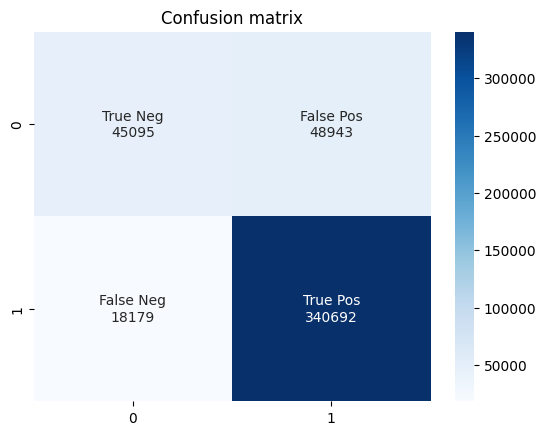

In [124]:
# ploting confusion matrix
plot_confusion_matrix(confusion_train)

__Confusion matrix on test dataset__

In [74]:
# confusion matrix
confusion_test =metrics.confusion_matrix(y_test, y_pred_class)
print(confusion_test)

[[ 13289  18055]
 [  5756 113870]]


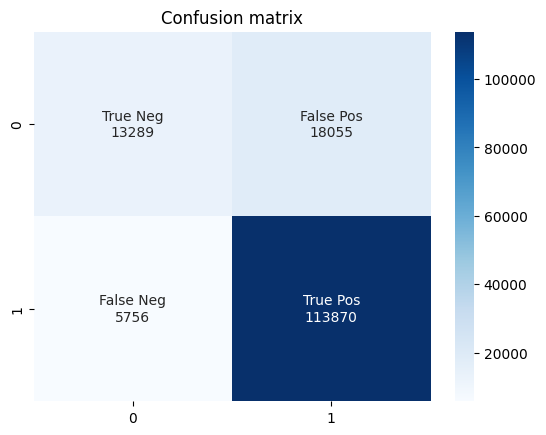

In [126]:
# ploting confusion matrix
plot_confusion_matrix(confusion_test)

__Other Matrics - Sensitivity, Specificity, Precision,Recall and F1 score for train and test dataset__

In [75]:
# for train dataset
TN_train = confusion_train[0, 0]
FP_train = confusion_train[0, 1]
FN_train = confusion_train[1, 0]
TP_train = confusion_train[1, 1]

In [76]:
# for test datset
TN_test = confusion_test[0, 0]
FP_test = confusion_test[0, 1]
FN_test = confusion_test[1, 0]
TP_test = confusion_test[1, 1]

__Sensitivity Metrics__

__Sensitivity (True Positive Rate)__ is a measure of the proportion of actual positive cases that got predicted as positive.

__Specificity (True Negative Rate)__ is defined as the proportion of actual negatives, which got predicted as the negative (or true negative).

__Sensitivity and Specificity__ measures are used to plot the ROC curve. And, Area under ROC curve (AUC) is used to determine the model performance.

True Positive Rate = True Positives / (True Positives + False Negatives)

False Positive Rate = False Positives / (False Positives + True Negatives)

In [77]:
sensitivity_train = TP_train / float(FN_train + TP_train)
sensitivity_test = TP_test / float(FN_test + TP_test)
print("sensitivity on train dataset",sensitivity_train)
print("sensitivity on test dataset",sensitivity_test)

sensitivity on train dataset 0.9493439146657155
sensitivity on test dataset 0.9518833698359889


In [78]:
specificity_train = TN_train / float(TN_train + FP_train)
specificity_test = TN_test / float(TN_test + FP_test)
print("specificity on train dataset",specificity_train)
print("specificity on train dataset",specificity_test)


specificity on train dataset 0.4795401858823029
specificity on train dataset 0.42397269014803474


In [79]:
precision_train = TP_train / float(TP_train + FP_train)
precision_test = TP_test / float(TP_test + FP_test)
print("precision on train dataset",precision_train)
print("precision on test dataset",precision_test)

precision on train dataset 0.874387567851964
precision on test dataset 0.863141936706462


In [80]:
print("RECALL SCORE on train dataset :", metrics.recall_score(y_train, y_pred_train,pos_label=1))
print("RECALL SCORE on test dataset :", metrics.recall_score(y_test, y_pred_class,pos_label=1))

RECALL SCORE on train dataset : 0.9493439146657155
RECALL SCORE on test dataset : 0.9518833698359889


In [81]:
print("F1 SCORE for train dataset :",metrics.f1_score(y_train, y_pred_train,pos_label=1))
print("F1 SCORE for test dataset :",metrics.f1_score(y_test, y_pred_class,pos_label=1))

F1 SCORE for train dataset : 0.9103253681333217
F1 SCORE for test dataset : 0.905343250474059


In [136]:
y_pred_proba

array([[4.16222325e-02, 9.58377767e-01],
       [3.16678813e-02, 9.68332119e-01],
       [1.02422345e-01, 8.97577655e-01],
       ...,
       [1.47766375e-02, 9.85223363e-01],
       [2.99998034e-02, 9.70000197e-01],
       [2.12433045e-04, 9.99787567e-01]])

In [82]:
# creating an ROC curve
from sklearn.metrics import confusion_matrix as sk_confusion_matrix
from sklearn.metrics import roc_curve, auc, classification_report
import matplotlib.pyplot as plt

In [83]:
# for train dataset
false_positive_rate_tr, true_positive_rate_tr, thresholds_tr = roc_curve(y_train, y_pred_proba_tr[:,1])
roc_auc_tr = auc(false_positive_rate_tr, true_positive_rate_tr)

In [84]:
# for test dataset
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_proba[:,1])
roc_auc = auc(false_positive_rate, true_positive_rate)

In [85]:
# area under the curve
print (roc_auc)

0.8994141448180504


In [86]:
# matrix of thresholds, tpr, fpr
pd.DataFrame({'Threshold': thresholds,
              'TPR': true_positive_rate,
              'FPR':false_positive_rate
             })

,Threshold,TPR,FPR
0,2.000000e+00,0.000000,0.000000
1,1.000000e+00,0.025020,0.000670
2,1.000000e+00,0.025078,0.000670
3,1.000000e+00,0.025596,0.000670
4,1.000000e+00,0.026633,0.000702
...,...,...,...
31366,1.413510e-28,0.999983,0.999809
31367,1.022639e-28,0.999992,0.999809
31368,1.651880e-33,0.999992,0.999936
31369,4.838477e-38,0.999992,1.000000


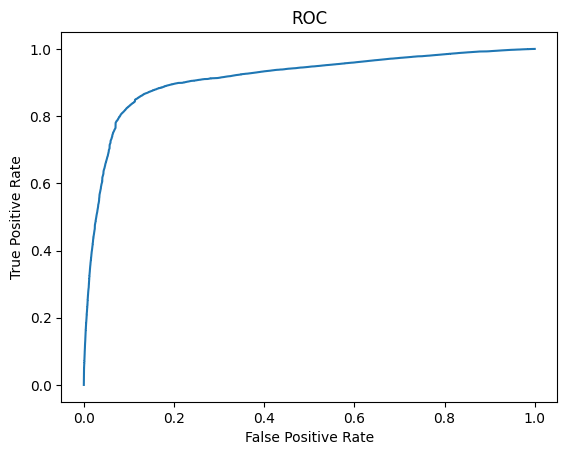

In [142]:
# plotting the ROC curve for train set
%matplotlib inline
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate_tr, true_positive_rate_tr)

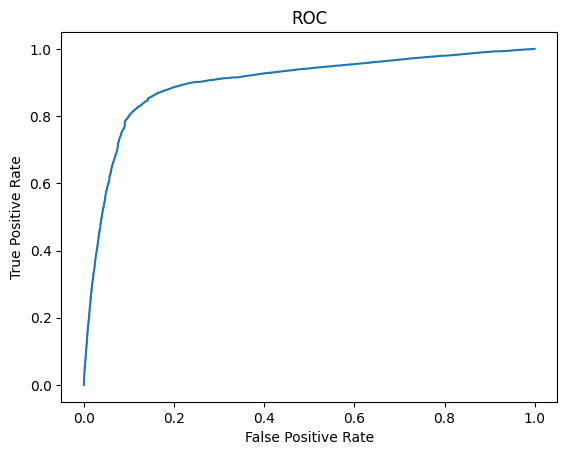

In [143]:
# plotting the ROC curve for test set
%matplotlib inline
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC')
plt.plot(false_positive_rate, true_positive_rate)

### sesnitivity-specificity and precision-recall matrix for the model

__Models accuracy,sensitivity,specificity on train and test dataset are :__

Train dataset :accuracy(85%),sensitivity (94%),specificity(47%)

Test Dataset : accuracy(84%),sensitivity (95%),specificity(42%)

Area under curve : 89.9% for both train and test dataset.

Since the distribution of the dataset is imbalanced with more positives, many reviews which were negative were incorrectly classified as positives by the NB model and hence the low specificity. From a business point of view, this is not a very good model as you will miss out on the negatives of your competitors. Knowing the weaknesses of your competitors help you design better features for the product and devise your marketing strategies accordingly.

In [87]:
# Printing the classification report
print("report for train set")
print(classification_report(y_train, y_pred_train))
print("report for test set")
print(classification_report(y_test, y_pred_class))

report for train set
              precision    recall  f1-score   support

           0       0.71      0.48      0.57     94038
           1       0.87      0.95      0.91    358871

    accuracy                           0.85    452909
   macro avg       0.79      0.71      0.74    452909
weighted avg       0.84      0.85      0.84    452909

report for test set
              precision    recall  f1-score   support

           0       0.70      0.42      0.53     31344
           1       0.86      0.95      0.91    119626

    accuracy                           0.84    150970
   macro avg       0.78      0.69      0.72    150970
weighted avg       0.83      0.84      0.83    150970

